In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import numpy as np
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 15.0
plt.rcParams["figure.figsize"] = [15, 10]

# from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [158]:
df = pd.read_csv("archive/USvideos.csv")

In [159]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [123]:
df.describe(include='all')

video_id trending_date                                       title  \
count         40949         40949                                       40949   
unique         6351           205                                        6455   
top     j4KvrAUjn6c      17.28.12  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
freq             30           200                                          30   
mean            NaN           NaN                                         NaN   
std             NaN           NaN                                         NaN   
min             NaN           NaN                                         NaN   
25%             NaN           NaN                                         NaN   
50%             NaN           NaN                                         NaN   
75%             NaN           NaN                                         NaN   
max             NaN           NaN                                         NaN   

       channel_title   category_id              publish_time    tags  \
count          40949  40949.000000                     40949   40949   
unique          2207           NaN                      6269    6055   
top             ESPN           NaN  2018-05-18T14:00:04.000Z  [none]   
freq             203           NaN                        50    1535   
mean             NaN     19.972429                       NaN     NaN   
std              NaN      7.568327                       NaN     NaN   
min              NaN      1.000000                       NaN     NaN   
25%              NaN     17.000000                       NaN     NaN   
50%              NaN     24.000000                       NaN     NaN   
75%              NaN     25.000000                       NaN     NaN   
max              NaN     43.000000                       NaN     NaN   

               views         likes      dislikes  comment_count  \
count   4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean    2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03   
std     7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04   
min     5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00   
25%     2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02   
50%     6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03   
75%     1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03   
max     2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06   

                                        thumbnail_link comments_disabled  \
count                                            40949             40949   
unique                                            6352                 2   
top     https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg             False   
freq                                                30             40316   
mean                                               NaN               NaN   
std                                                NaN               NaN   
min                                                NaN               NaN   
25%                                                NaN               NaN   
50%                                                NaN               NaN   
75%                                                NaN               NaN   
max                                                NaN               NaN   

       ratings_disabled video_error_or_removed  \
count             40949                  40949   
unique                2                      2   
top               False                  False   
freq              40780                  40926   
mean                NaN                    NaN   
std                 NaN                    NaN   
min                 NaN                    NaN   
25%                 NaN                    NaN   
50%  

In [222]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'] = df['publish_time'].dt.tz_convert('US/Central')
df['publish_year'] = pd.DatetimeIndex(df['publish_time']).year
df['publish_month'] = pd.DatetimeIndex(df['publish_time']).month
df['publish_day'] = pd.DatetimeIndex(df['publish_time']).day
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_time_part_of_day'] = (df['publish_time'].dt.hour % 24 + 4) // 4
df['publish_time_part_of_day'] = df['publish_time_part_of_day'].replace({1: 'Late Night',
                                                        2: 'Early Morning',
                                                        3: 'Morning',
                                                        4: 'Noon',
                                                        5: 'Evening',
                                                        6: 'Night'})
df['trending_date'] = '20' + df['trending_date']
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y.%d.%m')
df['trending_year'] = pd.DatetimeIndex(df['trending_date']).year
df['trending_month'] = pd.DatetimeIndex(df['trending_date']).month
df['trending_day'] = pd.DatetimeIndex(df['trending_date']).day
df['trending_day'] = df['trending_date'].dt.day_name()

In [223]:
print(df['trending_date'].min(), df['trending_date'].max())

2017-11-14 00:00:00 2018-06-14 00:00:00


In [225]:
df.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

      category_id              publish_time  \
0  People & Blogs 2017-11-13 11:13:01-06:00   
1   Entertainment 2017-11-13 01:30:00-06:00   
2          Comedy 2017-11-12 13:05:24-06:00   
3   Entertainment 2017-11-13 05:00:04-06:00   
4   Entertainment 2017-11-12 12:01:41-06:00   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...  ratings_disabled video_error_or_removed  \
0      2966  ...             False                  False   
1      6146  ...             False                  False   
2      5339  ...             False                  False   
3       666  ...             False                  False   
4      1989  ...             False                  False   

                                         description  publish_year  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...          2017   
1  One year after the presidential election, John...          2017   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          2017   
3  Today we find out if Link is a Nickelback amat...          2017   
4  I know it's been a while since we did this sho...          2017   

   publish_month publish_day  publish_time_part_of_day  trending_year  \
0             11      Monday                   Morning           2017   
1             11      Monday                Late Night           2017   
2             11      Sunday                      Noon           2017   
3             11      Monday             Early Morning           2017   
4             11      Sunday                      Noon           2017   

  trending_month trending_day  
0             11      Tuesday  
1             11      Tuesday  
2             11      Tuesday  
3             11      Tuesday  
4             11      Tuesday  

[5 rows x 23 columns]

In [227]:
timeframe = df.groupby(['publish_time']).sum().reset_index()

In [260]:
timeframe = timeframe[timeframe['publish_time']>='2017-10-15 03:24:11-0500']

In [261]:
fig = px.line(timeframe, x='publish_time', y="views")
fig.show()

In [262]:
fig = px.line(timeframe, x='publish_time', y="likes")
fig.show()

In [263]:
fig = px.line(timeframe, x='publish_time', y="dislikes")
fig.show()

In [264]:
fig = px.line(timeframe, x='publish_time', y="comment_count")
fig.show()

In [265]:
from plotly.subplots import make_subplots

In [266]:
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(go.scatter( x=timeframe['publish_time'],y=timeframe["comment_count"]),row=1, col=1)

fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.show()

TypeError: 'module' object is not callable

In [267]:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Views","Likes", "Dislikes","Comments"))
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["views"]),
              row=1, col=1)
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["likes"]),
              row=1, col=2)
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["dislikes"]),
              row=2, col=1)
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["comment_count"]),
              row=2, col=2)

In [270]:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Views","Likes", "Dislikes","Comments"))
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["views"],line_shape='linear'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["likes"]),
              row=1, col=2)
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["dislikes"]),
              row=2, col=1)
fig.add_trace(go.Scatter(x=timeframe['publish_time'],y=timeframe["comment_count"]),
              row=2, col=2)

In [127]:
df['video_id'].value_counts()

j4KvrAUjn6c    30
QBL8IRJ5yHU    29
8h--kFui1JA    29
NBSAQenU2Bk    29
r-3iathMo7o    29
               ..
l7je4VAUvjA     1
0-_h-qFt_zs     1
fEqzx-36pOo     1
Vf76O7y-7pk     1
bvh_H0LsXpk     1
Name: video_id, Length: 6351, dtype: int64

In [160]:
with open('archive/US_category_id.json') as f:
    data = json.load(f)

category_data = {}
for item in data['items']:
    category_data[int(item['id'])] = item['snippet']['title']
category_data

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [161]:
df['category_id'][:]

0        22
1        24
2        23
3        24
4        24
         ..
40944    15
40945    22
40946    24
40947     1
40948    20
Name: category_id, Length: 40949, dtype: int64

In [162]:
df = df.replace({"category_id": category_data})

In [163]:
df.head(2)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

      category_id              publish_time  \
0  People & Blogs  2017-11-13T17:13:01.000Z   
1   Entertainment  2017-11-13T07:30:00.000Z   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...

<AxesSubplot:xlabel='views', ylabel='category_id'>

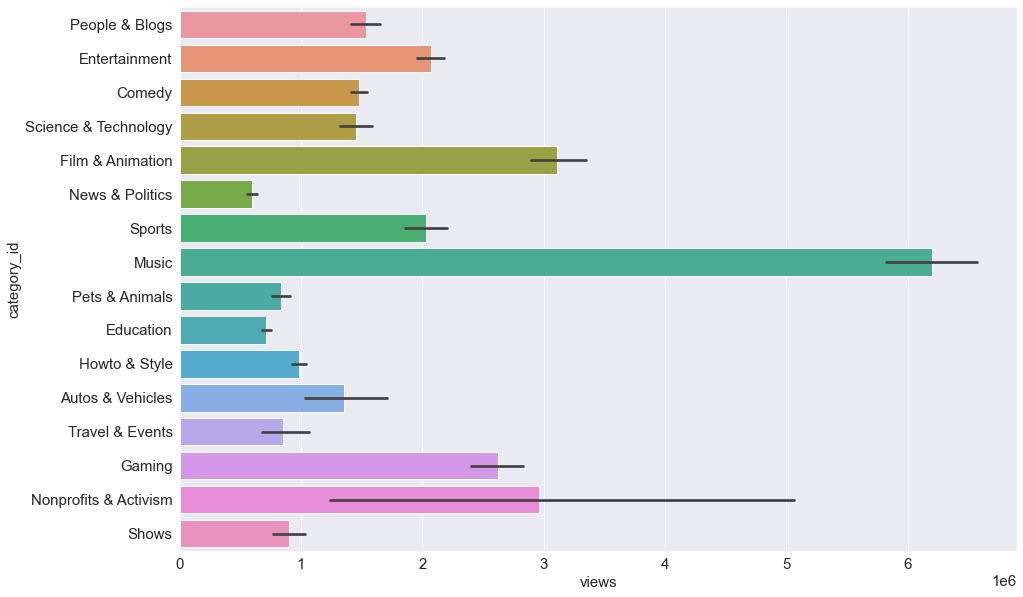

In [173]:
sns.barplot(y ='category_id', x='views', data=df)
# ax = sns.barplot(x="day", y="total_bill", data=tips)

In [184]:
df['category_id'].nunique()

16

In [182]:
top_6_categories = df['category_id'].value_counts().reset_index()

In [183]:
top_6_categories

index  category_id
0           Entertainment         9964
1                   Music         6472
2           Howto & Style         4146
3                  Comedy         3457
4          People & Blogs         3210
5         News & Politics         2487
6    Science & Technology         2401
7        Film & Animation         2345
8                  Sports         2174
9               Education         1656
10         Pets & Animals          920
11                 Gaming          817
12        Travel & Events          402
13       Autos & Vehicles          384
14  Nonprofits & Activism           57
15                  Shows           57

In [186]:
top_6_categories_by_likes = df.groupby(['category_id'])['likes'].sum().reset_index()
top_6_categories_by_likes.sort_values(by='likes', ascending=False)

category_id       likes
7                   Music  1416838584
3           Entertainment   530516491
1                  Comedy   216346746
10         People & Blogs   186615999
4        Film & Animation   165997476
6           Howto & Style   162880075
14                 Sports    98621211
12   Science & Technology    82532638
5                  Gaming    69038284
2               Education    49257772
11         Pets & Animals    19370702
8         News & Politics    18151033
9   Nonprofits & Activism    14815646
15        Travel & Events     4836246
0        Autos & Vehicles     4245656
13                  Shows     1082639

In [188]:
top_6_categories_by_views = df.groupby(['category_id'])['views'].sum().reset_index()
top_6_categories_by_views.sort_values(by='views', ascending=False)

category_id        views
7                   Music  40132892190
3           Entertainment  20604388195
4        Film & Animation   7284156721
1                  Comedy   5117426208
10         People & Blogs   4917191726
14                 Sports   4404456673
6           Howto & Style   4078545064
12   Science & Technology   3487756816
5                  Gaming   2141218625
8         News & Politics   1473765704
2               Education   1180629990
11         Pets & Animals    764651989
0        Autos & Vehicles    520690717
15        Travel & Events    343557084
9   Nonprofits & Activism    168941392
13                  Shows     51501058

In [185]:
top_6_categories_by_views = df.groupby(['category_id'])['dislikes'].sum().reset_index()
top_6_categories_by_views.sort_values(by='dislikes')

category_id  dislikes
13                  Shows     24508
0        Autos & Vehicles    243010
15        Travel & Events    340427
11         Pets & Animals    527379
2               Education   1351972
9   Nonprofits & Activism   3310381
8         News & Politics   4180049
12   Science & Technology   4548402
14                 Sports   5133551
6           Howto & Style   5473899
4        Film & Animation   6075148
1                  Comedy   7230391
5                  Gaming   9184466
10         People & Blogs  10187901
3           Entertainment  42987663
7                   Music  51179008

In [89]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [104]:
my_stopwords = stopwords.words('english') + ["http","https","https/","http/","n","nhttp","nhttps", "www",
                                            "com", "facebook", "instagram", "youtube","url","smarturl","twitter",
                                            "Follow", "nFollow", "ly","nly","nI","lnk","link","bit","bitly",
                                            "video","subscribe","yt"," yt","yt ","videos","videos "," videos","IQ","id",
                                             "channel","nsubscribe","amzn"," amzn","amzn "]

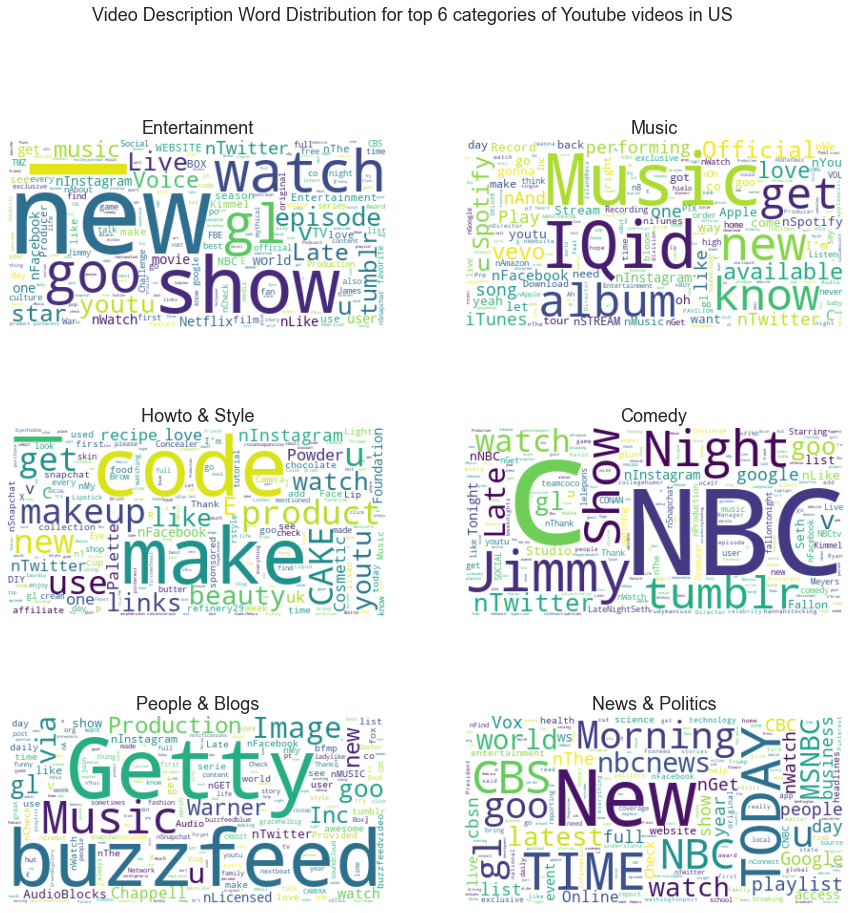

In [105]:
fig,ax = plt.subplots(3,2, figsize =(15,15))
for i, subplot in zip(top_6_categories['index'], ax.flatten()):
    cat_data = df[df['category_id']==i]
    text = ""
    for t in cat_data.description:
        text += str(t) + " "
    word_cloud = WordCloud(collocations = False, stopwords=my_stopwords, background_color = 'white').generate(text)
    # Display the generated Word Cloud
    plt.axes(subplot)
    plt.title(i)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
plt.suptitle("Video Description Word Distribution for top 6 categories of Youtube videos in US")
plt.savefig('Description Word Distribution.jpg')

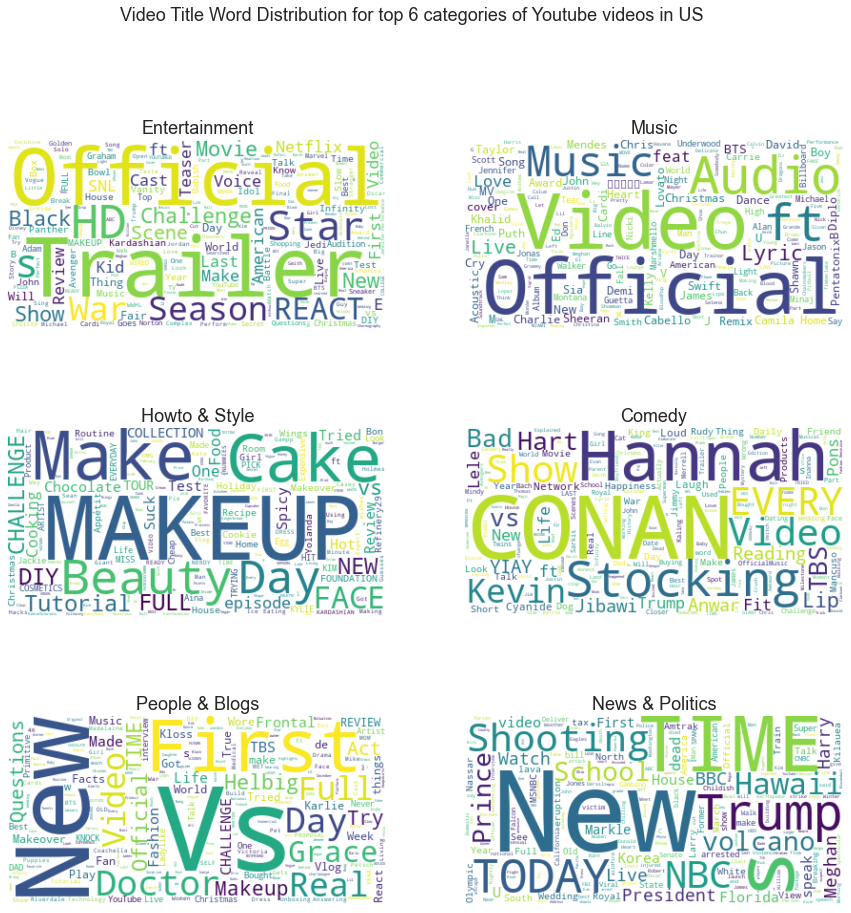

In [11]:
fig,ax = plt.subplots(3,2, figsize =(15,15))
for i, subplot in zip(top_6_categories['index'], ax.flatten()):
    cat_data = df[df['category_id']==i]
    text = ""
    for t in cat_data.title:
        text += t + " "
    word_cloud = WordCloud(collocations = False, stopwords=my_stopwords, background_color = 'white').generate(text)
    # Display the generated Word Cloud
    plt.axes(subplot)
    plt.title(i)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
plt.suptitle("Video Title Word Distribution for top 6 categories of Youtube videos in US")
plt.savefig('Title Word Distribution.jpg')

In [12]:
text=df['title']+' '+df['description'].astype(str)
df['all_text']=text
df=rem_stopwords_tokenize(df,'all_text')
df=make_sentences(df,'all_text')

NameError: name 'rem_stopwords_tokenize' is not defined

In [13]:
df.head(4)

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   

      category_id              publish_time  \
0  People & Blogs  2017-11-13T17:13:01.000Z   
1   Entertainment  2017-11-13T07:30:00.000Z   
2          Comedy  2017-11-12T19:05:24.000Z   
3   Entertainment  2017-11-13T11:00:04.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
1  One year after the presidential election, John...   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...   
3  Today we find out if Link is a Nickelback amat...   

                                            all_text  
0  WE WANT TO TALK ABOUT OUR MARRIAGE SHANTELL'S ...  
1  The Trump Presidency: Last Week Tonight with J...  
2  Racist Superman | Rudy Mancuso, King Bach & Le...  
3  Nickelback Lyrics: Real or Fake? Today we find...

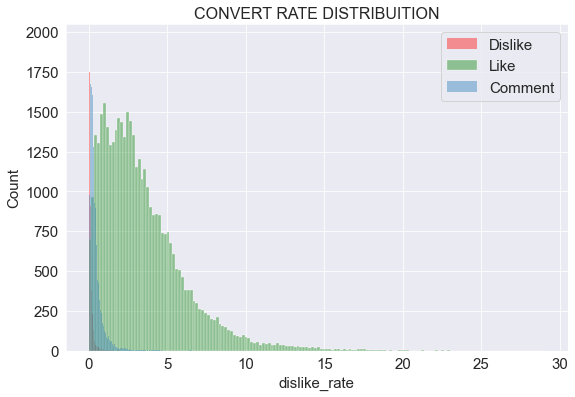

In [112]:
# sns.(df['dislike_rate'], color='red')
plt.figure(figsize = (9,6))

g1 = sns.histplot(df['dislike_rate'], color='red', label="Dislike",alpha =0.4)
g1 = sns.histplot(df['like_rate'], color='green', label="Like",alpha =0.4)
g1 = sns.histplot(df['comment_rate'],label="Comment",alpha =0.4)
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()

C:\Users\mkban\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mkban\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mkban\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

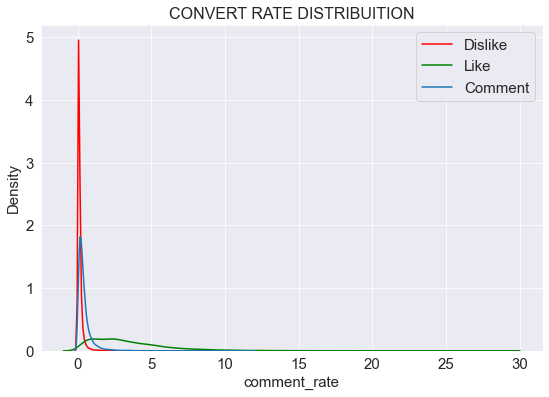

In [107]:
df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['comment_rate'] =  df ['comment_count'] / df['views'] * 100

plt.figure(figsize = (9,6))

g1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)

plt.legend()
plt.show()

In [15]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'all_text', 'like_rate',
       'dislike_rate', 'comment_rate'],
      dtype='object')

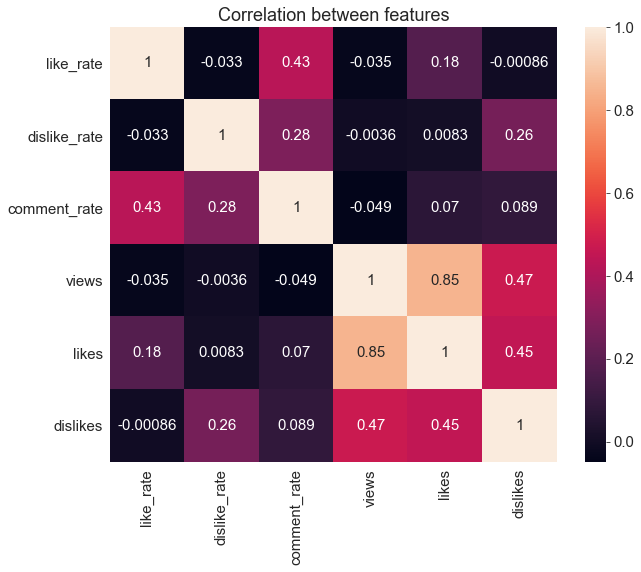

In [16]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate',
         'views','likes','dislikes', "category_id"]].corr(), annot=True)
plt.title('Correlation between features')
plt.savefig('Correlation.jpg')

In [70]:
channels = df['channel_title'].value_counts().nlargest(15).reset_index()

In [71]:
channels

index  channel_title
0                                     ESPN            203
1   The Tonight Show Starring Jimmy Fallon            197
2                                  Netflix            193
3                             TheEllenShow            193
4                                      Vox            193
5       The Late Show with Stephen Colbert            187
6                        Jimmy Kimmel Live            186
7              Late Night with Seth Meyers            183
8                           Screen Junkies            182
9                                      NBA            181
10                                     CNN            180
11                     Saturday Night Live            175
12                                   WIRED            171
13                           BuzzFeedVideo            169
14                                 INSIDER            167

In [67]:
# channels = channels.rename(columns = {'index':'channel_title', 'channel_title':'Total_count'})

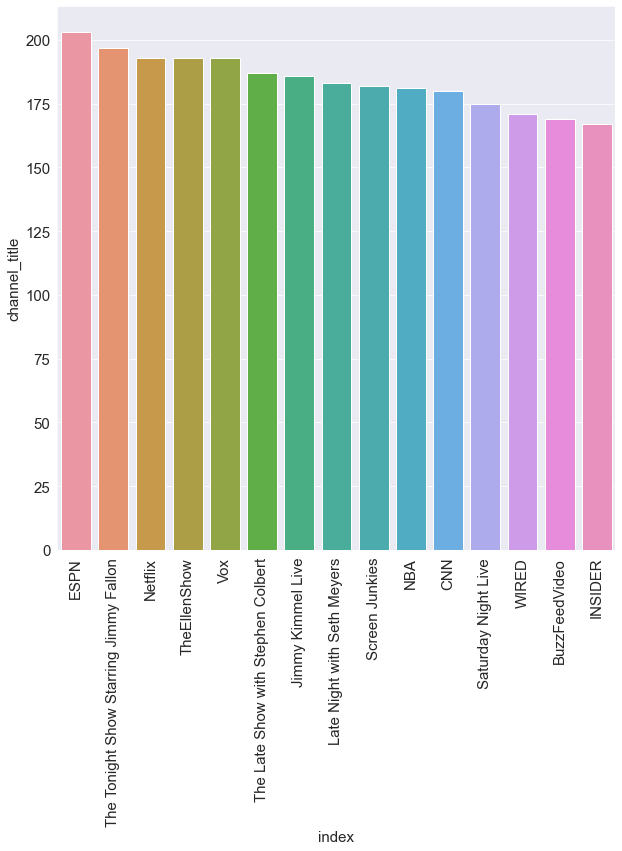

In [72]:
fig,ax = plt.subplots(1,1, figsize =(10,10))
g = sns.barplot(x="index", y="channel_title", data=channels)
ax.tick_params(axis='x', rotation=90)
# plt.savefig('Channel.jpg')

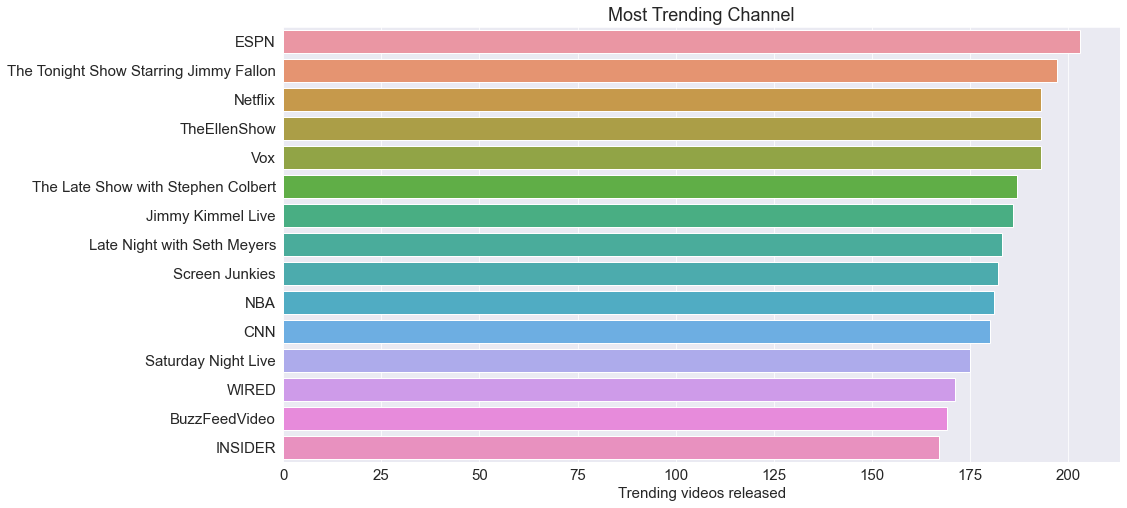

In [196]:
fig,ax = plt.subplots(1,1, figsize =(15,8))
g = sns.barplot(x="channel_title", y="index", data=channels)
plt.xlabel('Trending videos released')
plt.ylabel('')
plt.title('Most Trending Channel')
plt.savefig('Trending_Channel.jpg')
# ax.tick_params(axis='x', rotation=90)

In [145]:
p = df.groupby(['video_id','title','category_id']).count().reset_index()
#.trending_date.sort_values(ascending=False)

In [148]:
p.columns

Index(['video_id', 'title', 'category_id', 'trending_date', 'channel_title',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [154]:
p_new = p[['video_id', 'title', 'category_id', 'trending_date']].sort_values(by=['trending_date'],ascending=False)
# p_new.trending_date.sort_values(ascending=False)

In [157]:
p_new.head(10)

video_id                                              title  \
4765  j4KvrAUjn6c         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
4690  iILJvqrAQ_w                Charlie Puth - BOY [Official Audio]   
5845  t4pRQ0jn23Q  YoungBoy Never Broke Again Goes Sneaker Shoppi...   
5595  r-3iathMo7o               The ULTIMATE $30,000 Gaming PC Setup   
984   8h--kFui1JA        Sam Smith - Pray (Official Video) ft. Logic   
2471  NBSAQenU2Bk  Rooster Teeth Animated Adventures - Millie So ...   
2795  QBL8IRJ5yHU  Why I'm So Scared (being myself and crying too...   
5140  mdWcaWBxxcY  Rita Ora - Girls ft. Cardi B, Bebe Rexha & Cha...   
3376  WIV3xNz8NoM                                 Cobra Kai Season 2   
3224  UfKmSfgFxi8         FORTNITE The Movie (Official Fake Trailer)   

               category_id  trending_date  
4765         Entertainment             30  
4690                 Music             29  
5845         Entertainment             29  
5595  Science & Technology             29  
984                  Music             29  
2471      Film & Animation             29  
2795         Howto & Style             29  
5140         Entertainment             28  
3376         Entertainment             28  
3224         Entertainment             28

In [ ]:
sns.barplot(x="channel_title", y="index", data=channels)

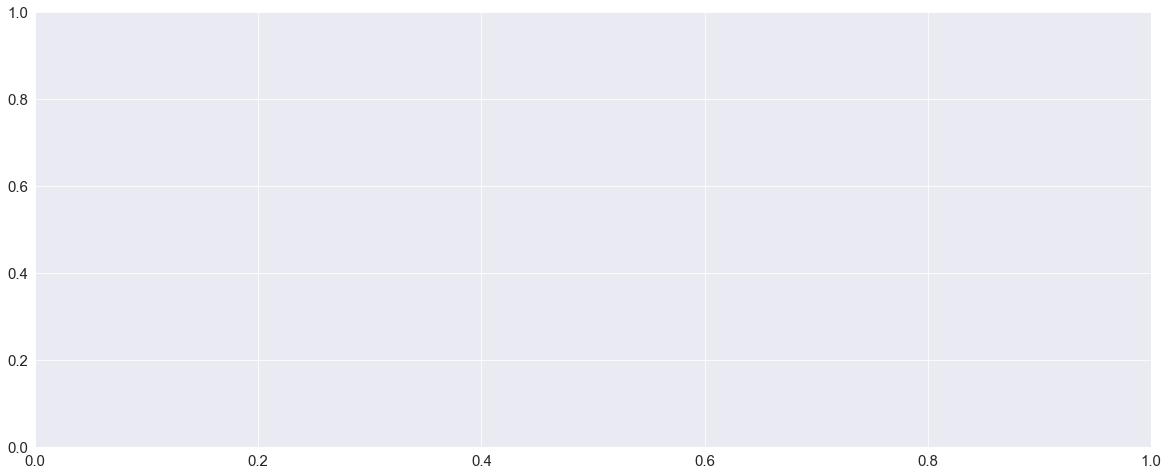

In [220]:
plt.subplots(1,1, figsize =(20,8))
fig = px.bar(channels.head(10),y="index", x="channel_title")
fig.update_layout(
    title='Top 10 Channels with most number of Trending Videos',
    xaxis=dict(title='Number of videos'),
    yaxis=dict(title=''))
fig.show()

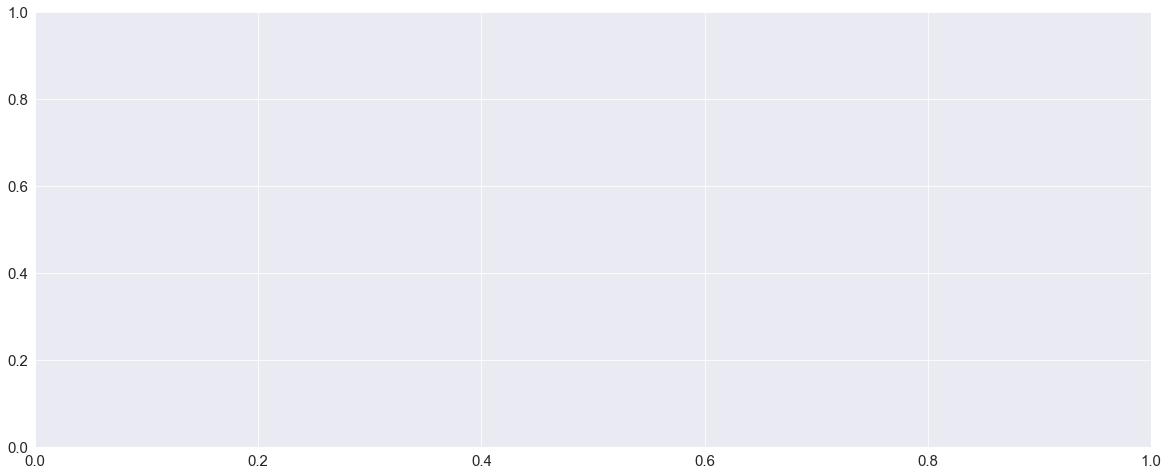

In [218]:
plt.subplots(1,1, figsize =(20,8))
fig = px.bar(p_new.head(10),y="title", x="trending_date", color='category_id')
fig.update_layout(
    title='Top 10 Trending Videos for most number of Day',
    xaxis=dict(title='Number of days'),
    yaxis=dict(title=''))
fig.show()

No handles with labels found to put in legend.


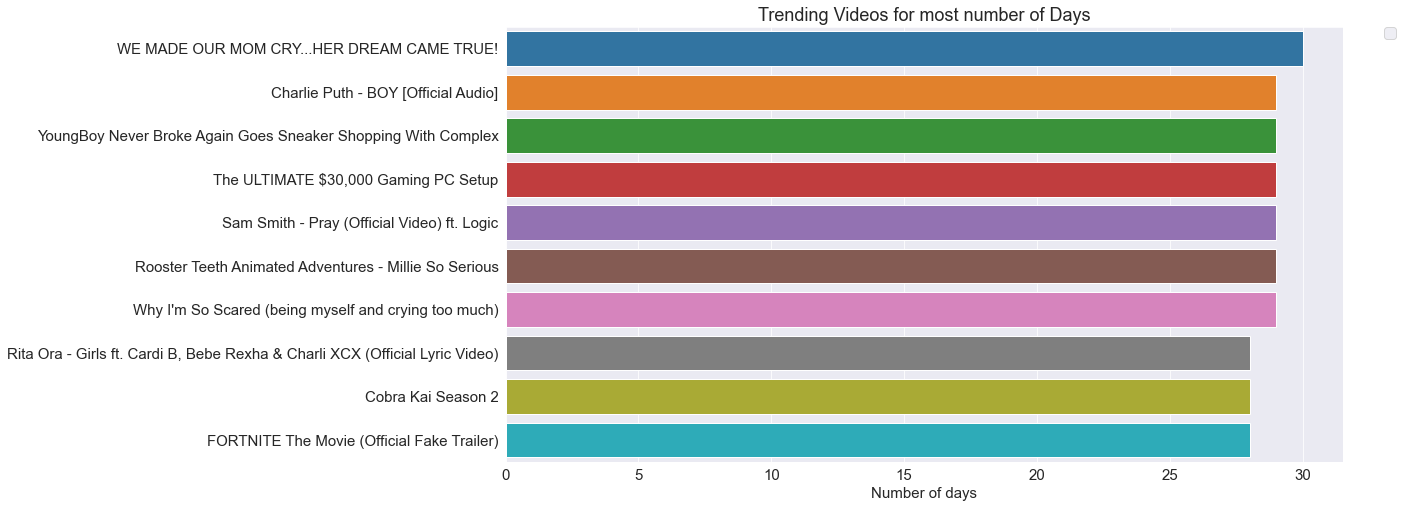

In [208]:
fig,ax = plt.subplots(1,1, figsize =(15,8))
g = sns.barplot(y="title", x="trending_date", hue='category_id', data=p_new.head(10))
plt.xlabel('Number of days')
plt.ylabel('')
plt.title('Trending Videos for most number of Days')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.savefig('Trending_video.jpg')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

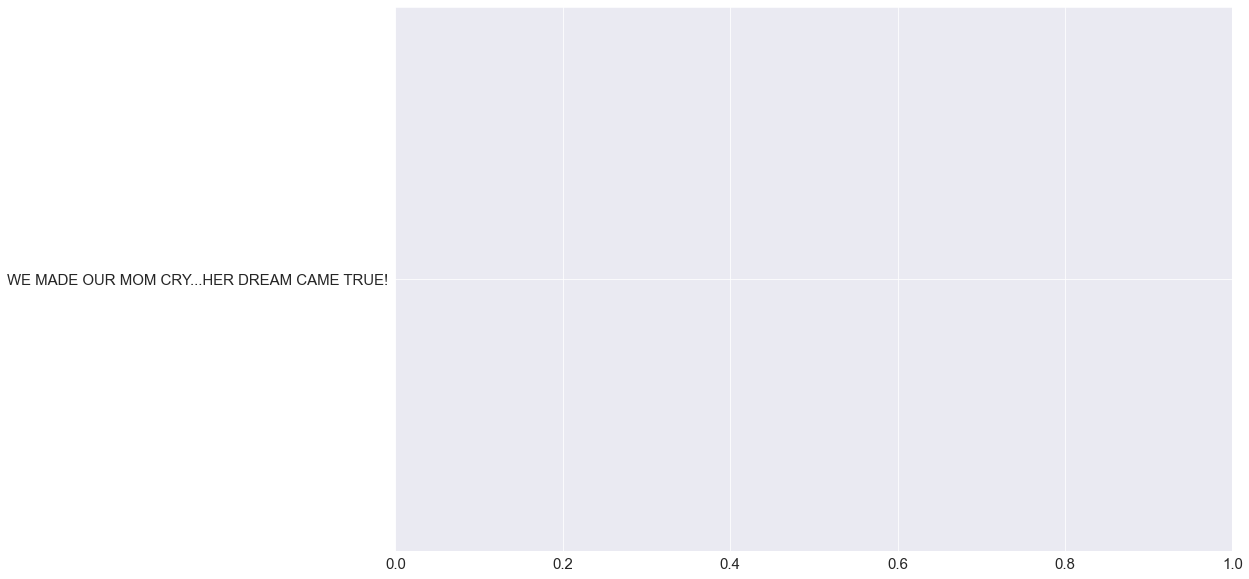

In [207]:
plt.barh(p_new["title"].head(10), p_new["trending_date"].head(10),fill =p_new['category_id'] )

In [179]:
df[df['video_id']=='j4KvrAUjn6c']

video_id trending_date                                       title  \
34550  j4KvrAUjn6c      18.14.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
34752  j4KvrAUjn6c      18.15.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
34901  j4KvrAUjn6c      18.15.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
34966  j4KvrAUjn6c      18.16.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
35180  j4KvrAUjn6c      18.17.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
35396  j4KvrAUjn6c      18.18.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
35600  j4KvrAUjn6c      18.19.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
35804  j4KvrAUjn6c      18.20.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
36035  j4KvrAUjn6c      18.21.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
36245  j4KvrAUjn6c      18.22.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
36453  j4KvrAUjn6c      18.23.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
36661  j4KvrAUjn6c      18.24.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
36868  j4KvrAUjn6c      18.25.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
37080  j4KvrAUjn6c      18.26.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
37291  j4KvrAUjn6c      18.27.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
37493  j4KvrAUjn6c      18.28.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
37694  j4KvrAUjn6c      18.29.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
37899  j4KvrAUjn6c      18.30.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
38108  j4KvrAUjn6c      18.31.05  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
38307  j4KvrAUjn6c      18.01.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
38510  j4KvrAUjn6c      18.02.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
38715  j4KvrAUjn6c      18.03.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
38918  j4KvrAUjn6c      18.04.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
39122  j4KvrAUjn6c      18.05.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
39326  j4KvrAUjn6c      18.06.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
39529  j4KvrAUjn6c      18.07.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
39731  j4KvrAUjn6c      18.08.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
39937  j4KvrAUjn6c      18.09.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
40146  j4KvrAUjn6c      18.10.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
40346  j4KvrAUjn6c      18.11.06  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   

          channel_title    category_id              publish_time  \
34550  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
34752  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
34901  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
34966  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
35180  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
35396  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
35600  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
35804  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
36035  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
36245  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
36453  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
36661  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
36868  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
37080  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
37291  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
37493  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
37694  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
37899  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
38108  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
38307  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
38510  Lucas and Marcus  Entertainment  2018-05-13T18:03:56.000Z   
38715  Lucas and Marcus  Entertai